In [6]:
#한글 시각화를 위한 셋팅

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import os

current_directory = os.getcwd()
font_path = os.path.join(current_directory, 'NanumBarunGothic.ttf')

#글꼴 경로가 존재하는지 확인
if os.path.exists(font_path):
    fm.fontManager.addfont(font_path)

    font_prop = fm.FontProperties(fname=font_path)
    plt.rc('font', family=font_prop.get_name())
    plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지


In [39]:
df = pd.read_csv('merge_out\번개_애플삼성통합_일단_최종_0627.csv', encoding='utf-8')
df

,data_pid,location,price,time,title,month,brand,series,model,storage
0,273826430,서울특별시 성북구 동선동,110000.0,2024-06-24 20:04:57,갤럭시s10 5g 256 잔상폰 팝니다,64,삼성,갤럭시 S10,regular,256
1,242900756,경기도 부천시 원미1동,165000.0,2024-06-24 19:49:57,갤럭시s10 5g 256기가 팝니다,64,삼성,갤럭시 S10,regular,256
2,274918206,서울특별시 금천구 가산동,140000.0,2024-06-24 19:23:57,*정상특가* 갤럭시s105g 256기가 5091828,64,삼성,갤럭시 S10,regular,256
3,271008580,인천광역시 남구 주안1동,110000.0,2024-06-24 19:23:57,갤럭시s10 128기가 그린 *가성비굿굿~/#88406,64,삼성,갤럭시 S10,regular,128
4,274903662,서울특별시 금천구 가산동,125000.0,2024-06-24 18:23:57,*특가처분* 갤럭시s10플러스 128기가 1384215,64,삼성,갤럭시 S10,plus,128
...,...,...,...,...,...,...,...,...,...,...
18485,260671589,충청북도 청주시 서원구 성화.개신.죽림동,1100000.0,2024-04-27 05:12:16,아이폰15 512기가 핑크,9,애플,아이폰 15,regular,512
18486,260439999,경기도 하남시 신장2동,1100000.0,2024-04-27 05:12:19,아이폰15 512기가 옐로우 자급제 팔아요~!,9,애플,아이폰 15,regular,512
18487,259355875,경상남도 김해시 장유1동,1200000.0,2024-04-27 05:12:21,아이폰 15 512기가 미개봉 자급제,9,애플,아이폰 15,regular,512
18488,257219297,서울특별시 서초구 잠원동,1300000.0,2024-03-28 05:12:27,아이폰 15 핑크 512G 애플 매장 구매,9,애플,아이폰 15,regular,512


In [41]:
#time > date로 변경
df['date'] = df['time']
df['date'] = pd.to_datetime(df['date'])
#2024년 4월 1일 이후 데이터만 추출
df = df[df['date'] >= '2024-04-01']
print(df.shape[0])
#브랜드 밸류 카운트
brand_value = df['brand'].value_counts()
brand_value

13571


C:\Users\Administrator\AppData\Local\Temp\ipykernel_13100\2598293273.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = df['time']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_13100\2598293273.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])


brand
애플    8832
삼성    4739
Name: count, dtype: int64

In [25]:
#4월이후 데이터만 저장
df.to_csv('merge_out\번개_애플삼성통합_일단_최종_0627_4월이후.csv', encoding='utf-8', index=False)
df

,data_pid,location,price,time,title,month,brand,series,model,storage,date
0,273826430,서울특별시 성북구 동선동,110000.0,2024-06-24 20:04:57,갤럭시s10 5g 256 잔상폰 팝니다,64,삼성,갤럭시 S10,regular,256,2024-06-24 20:04:57
1,242900756,경기도 부천시 원미1동,165000.0,2024-06-24 19:49:57,갤럭시s10 5g 256기가 팝니다,64,삼성,갤럭시 S10,regular,256,2024-06-24 19:49:57
2,274918206,서울특별시 금천구 가산동,140000.0,2024-06-24 19:23:57,*정상특가* 갤럭시s105g 256기가 5091828,64,삼성,갤럭시 S10,regular,256,2024-06-24 19:23:57
3,271008580,인천광역시 남구 주안1동,110000.0,2024-06-24 19:23:57,갤럭시s10 128기가 그린 *가성비굿굿~/#88406,64,삼성,갤럭시 S10,regular,128,2024-06-24 19:23:57
4,274903662,서울특별시 금천구 가산동,125000.0,2024-06-24 18:23:57,*특가처분* 갤럭시s10플러스 128기가 1384215,64,삼성,갤럭시 S10,plus,128,2024-06-24 18:23:57
...,...,...,...,...,...,...,...,...,...,...,...
18483,261202828,광주광역시 북구 중흥2동,1060000.0,2024-04-27 05:12:14,아이폰 15 플러스 512 블루,9,애플,아이폰 15,regular,512,2024-04-27 05:12:14
18484,261842738,부산광역시 기장군 일광면,1000000.0,2024-05-27 05:12:14,아이폰15 512 핑크 판매 합니다,9,애플,아이폰 15,regular,512,2024-05-27 05:12:14
18485,260671589,충청북도 청주시 서원구 성화.개신.죽림동,1100000.0,2024-04-27 05:12:16,아이폰15 512기가 핑크,9,애플,아이폰 15,regular,512,2024-04-27 05:12:16
18486,260439999,경기도 하남시 신장2동,1100000.0,2024-04-27 05:12:19,아이폰15 512기가 옐로우 자급제 팔아요~!,9,애플,아이폰 15,regular,512,2024-04-27 05:12:19


In [42]:
df = pd.read_csv('merge_out\번개_애플삼성통합_일단_최종_0627_4월이후.csv', encoding='utf-8')

In [27]:
#브랜드 밸류 카운트
brand_value = df['brand'].value_counts()
brand_value

brand
애플    8832
삼성    4739
Name: count, dtype: int64

In [28]:
#brand proportion
df['brand'].value_counts(normalize=True)

brand
애플    0.650799
삼성    0.349201
Name: proportion, dtype: float64

In [29]:
# 5월이후 데이터만 저장
df = df[df['date'] >= '2024-05-01']
df.to_csv('merge_out\번개_애플삼성통합_일단_최종_0627_5월이후.csv', encoding='utf-8', index=False)

In [30]:
df = pd.read_csv('merge_out\번개_애플삼성통합_일단_최종_0627_5월이후.csv', encoding='utf-8')

In [31]:
#brand proportion
df['brand'].value_counts(normalize=True)

brand
애플    0.604541
삼성    0.395459
Name: proportion, dtype: float64

In [32]:
df['brand'].value_counts()

brand
애플    6364
삼성    4163
Name: count, dtype: int64

<Axes: xlabel='brand'>

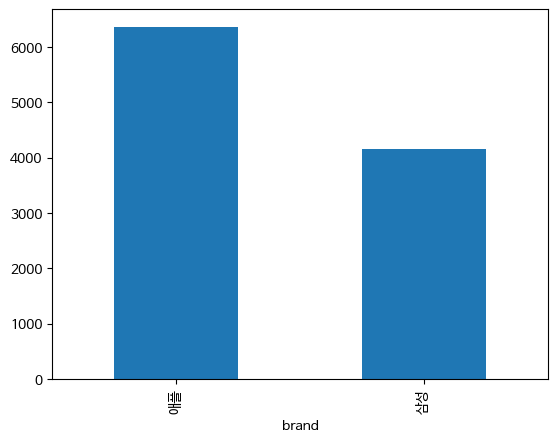

In [33]:
df['brand'].value_counts().plot(kind='bar')

In [34]:
#6월이후 데이터만 저장
df = df[df['date'] >= '2024-06-01']
df.to_csv('merge_out\번개_애플삼성통합_일단_최종_0627_6월이후.csv', encoding='utf-8', index=False)

In [35]:
df = pd.read_csv('merge_out\번개_애플삼성통합_일단_최종_0627_6월이후.csv', encoding='utf-8')

In [36]:
df['brand'].value_counts()

brand
애플    3525
삼성    2902
Name: count, dtype: int64

In [37]:
#brand proportion
df['brand'].value_counts(normalize=True)

brand
애플    0.548467
삼성    0.451533
Name: proportion, dtype: float64

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13571 entries, 0 to 13570
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   data_pid  13571 non-null  int64  
 1   location  13571 non-null  object 
 2   price     13571 non-null  float64
 3   time      13571 non-null  object 
 4   title     13571 non-null  object 
 5   month     13571 non-null  int64  
 6   brand     13571 non-null  object 
 7   series    13571 non-null  object 
 8   model     13571 non-null  object 
 9   storage   13571 non-null  object 
 10  date      13571 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 1.1+ MB


In [44]:
df['date'] = pd.to_datetime(df['time'])

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13571 entries, 0 to 13570
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   data_pid  13571 non-null  int64         
 1   location  13571 non-null  object        
 2   price     13571 non-null  float64       
 3   time      13571 non-null  object        
 4   title     13571 non-null  object        
 5   month     13571 non-null  int64         
 6   brand     13571 non-null  object        
 7   series    13571 non-null  object        
 8   model     13571 non-null  object        
 9   storage   13571 non-null  object        
 10  date      13571 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(7)
memory usage: 1.1+ MB


In [46]:
df.storage.value_counts()

storage
256      6426
128      4736
512      1476
64.0      300
256.0     208
1TB       165
64        134
128.0      88
512.0      38
Name: count, dtype: int64

In [47]:
df.storage.replace('1TB', '1024', inplace=True)

In [48]:
df.storage.value_counts()

storage
256      6426
128      4736
512      1476
64.0      300
256.0     208
1024      165
64        134
128.0      88
512.0      38
Name: count, dtype: int64

In [50]:
df.storage.astype('float')

0        256.0
1        256.0
2        256.0
3        128.0
4        128.0
         ...  
13566    512.0
13567    512.0
13568    512.0
13569    512.0
13570    512.0
Name: storage, Length: 13571, dtype: float64

In [51]:
df.storage.unique()

array(['256', '128', '512', '1024', '128.0', '256.0', '64.0', '512.0',
       '64'], dtype=object)

In [52]:
df['storage'] = df['storage'].astype('float')

In [53]:
df['storage'].value_counts()

storage
256.0     6634
128.0     4824
512.0     1514
64.0       434
1024.0     165
Name: count, dtype: int64

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13571 entries, 0 to 13570
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   data_pid  13571 non-null  int64         
 1   location  13571 non-null  object        
 2   price     13571 non-null  float64       
 3   time      13571 non-null  object        
 4   title     13571 non-null  object        
 5   month     13571 non-null  int64         
 6   brand     13571 non-null  object        
 7   series    13571 non-null  object        
 8   model     13571 non-null  object        
 9   storage   13571 non-null  float64       
 10  date      13571 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(2), object(6)
memory usage: 1.1+ MB


<Axes: xlabel='storage'>

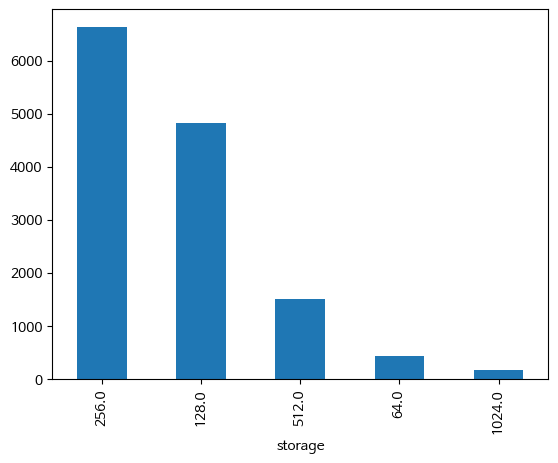

In [55]:
df['storage'].value_counts().plot(kind='bar')

In [56]:
#brand, series, medel 별 storage 평균
df.groupby(['brand', 'series', 'model'])['storage'].mean()

brand  series   model  
삼성     갤럭시 S10  e          144.168421
                plus       241.230769
                regular    249.183432
       갤럭시 S20  FE         128.000000
                Ultra      256.000000
                plus       251.586207
                regular    148.670807
       갤럭시 S21  Ultra      261.525180
                plus       256.000000
                regular    256.000000
       갤럭시 S22  Ultra      323.902439
                plus       256.000000
                regular    257.216152
       갤럭시 S23  Ultra      384.000000
                plus       437.677419
                regular    329.748344
       갤럭시 S24  Ultra      478.504673
                plus       371.565714
                regular    336.732026
애플     아이폰 12   mini       121.743017
                pro        202.732919
                pro max    217.043478
                regular    127.488000
       아이폰 13   mini       178.421217
                pro        222.947625
                pro max   

<Axes: xlabel='brand,series,model'>

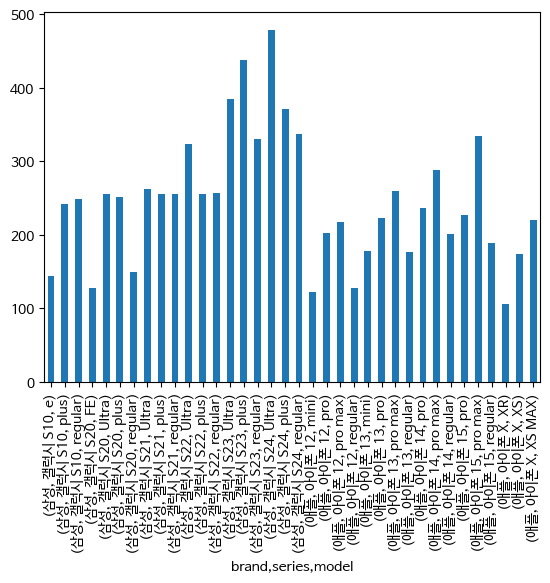

In [57]:
##brand, series, medel 별 storage 평균 시각화
df.groupby(['brand', 'series', 'model'])['storage'].mean().plot(kind='bar')

<Axes: xlabel='brand,series,model,storage'>

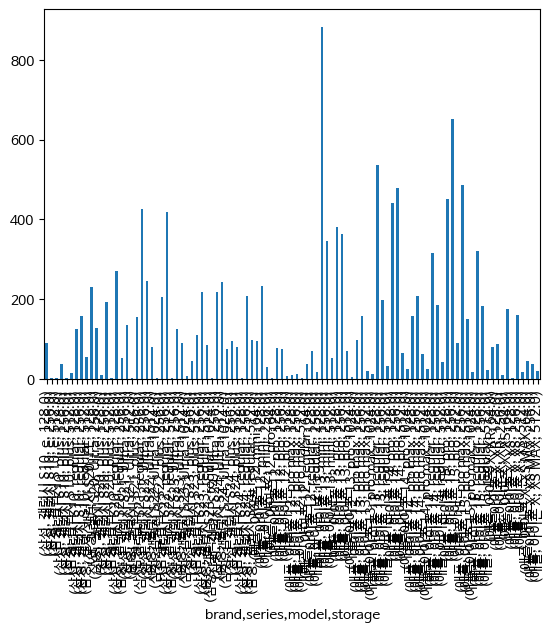

In [60]:
##brand, series, medel, storage 빈도 시각화
df.groupby(['brand', 'series', 'model', 'storage'])['model'].count().plot(kind='bar')

<Axes: xlabel='brand,series,model'>

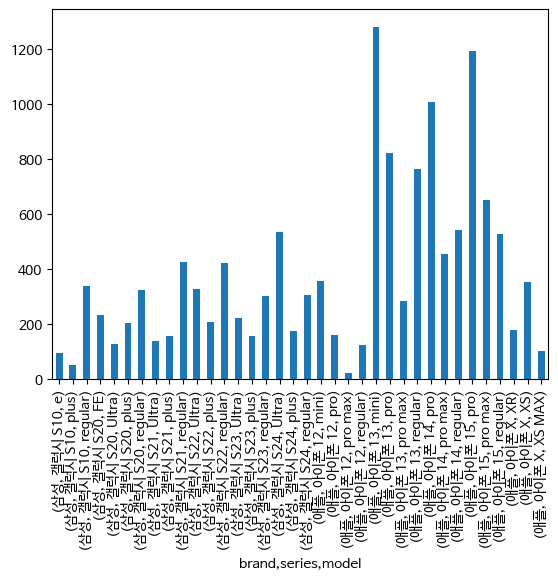

In [61]:
df.groupby(['brand', 'series', 'model'])['model'].count().plot(kind='bar')

<Axes: xlabel='brand,series,model'>

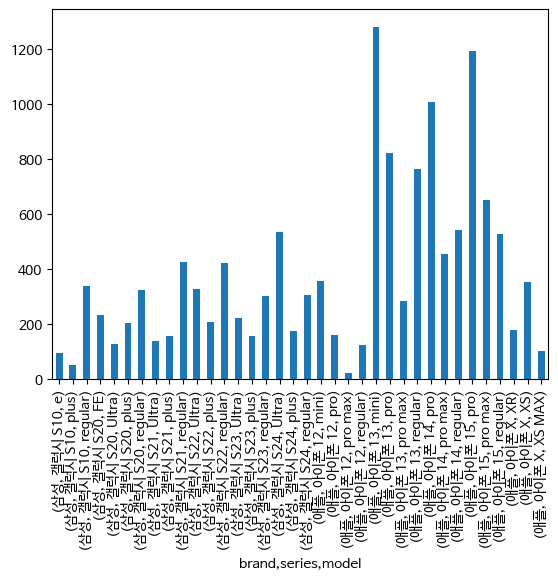

In [62]:
df.groupby(['brand', 'series', 'model'])['series'].count().plot(kind='bar')

<Axes: xlabel='series,model'>

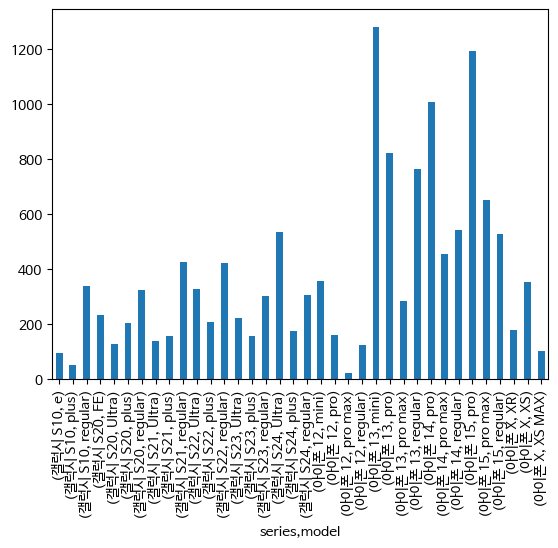

In [63]:
df.groupby(['series', 'model'])['series'].count().plot(kind='bar')

<Axes: xlabel='brand', ylabel='storage'>

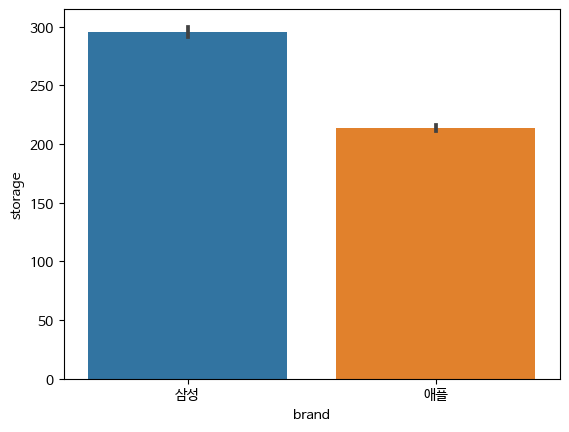

In [64]:
sns.barplot(x='brand', y='storage', data=df)

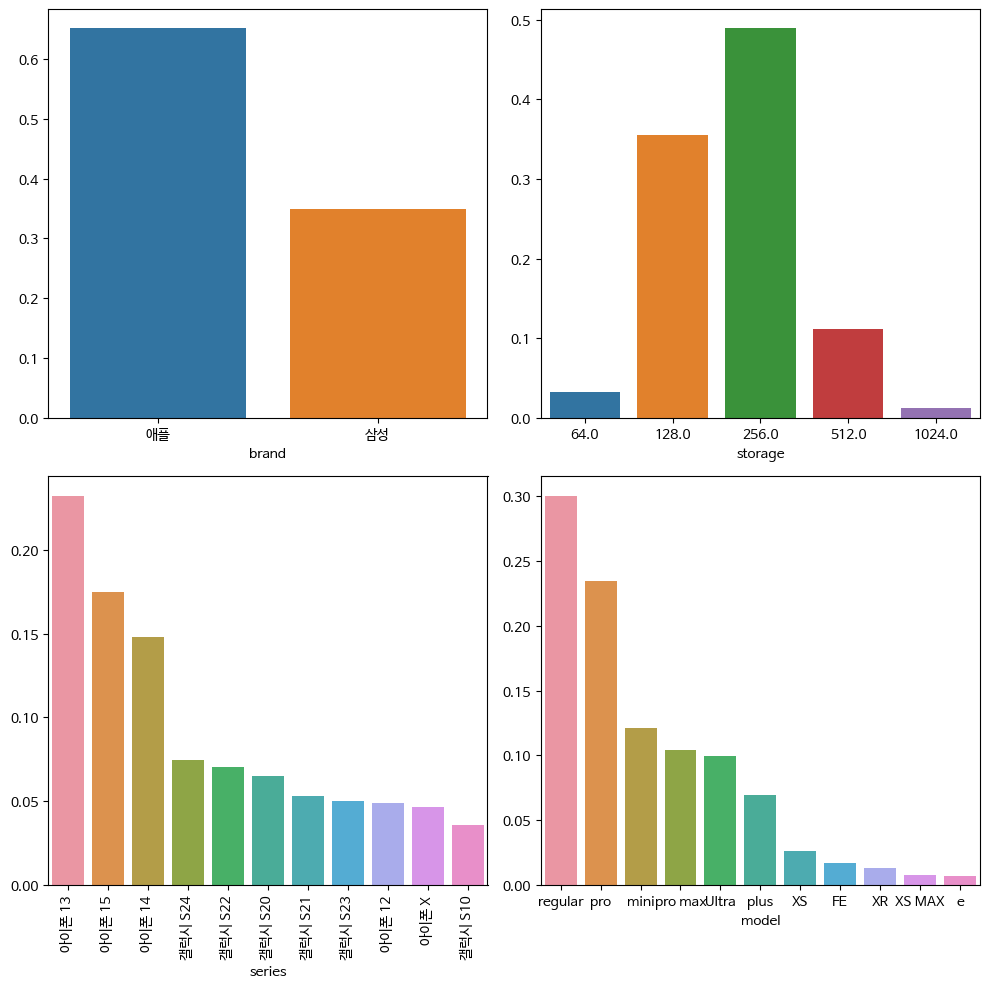

In [71]:
#brand_proportion, storage_proportion, series_proportion, model_proportion,
brand_proportion = df['brand'].value_counts(normalize=True)
storage_proportion = df['storage'].value_counts(normalize=True)
series_proportion = df['series'].value_counts(normalize=True)
model_proportion = df['model'].value_counts(normalize=True)


fig, axs = plt.subplots(2, 2, figsize=(10, 10))
sns.barplot(x=brand_proportion.index, y=brand_proportion.values, ax=axs[0, 0])
sns.barplot(x=storage_proportion.index, y=storage_proportion.values, ax=axs[0, 1])
sns.barplot(x=series_proportion.index, y=series_proportion.values, ax=axs[1, 0])
axs[1,0].set_xticklabels(axs[1,0].get_xticklabels(), rotation=90)
sns.barplot(x=model_proportion.index, y=model_proportion.values, ax=axs[1, 1])
plt.tight_layout()
plt.show()

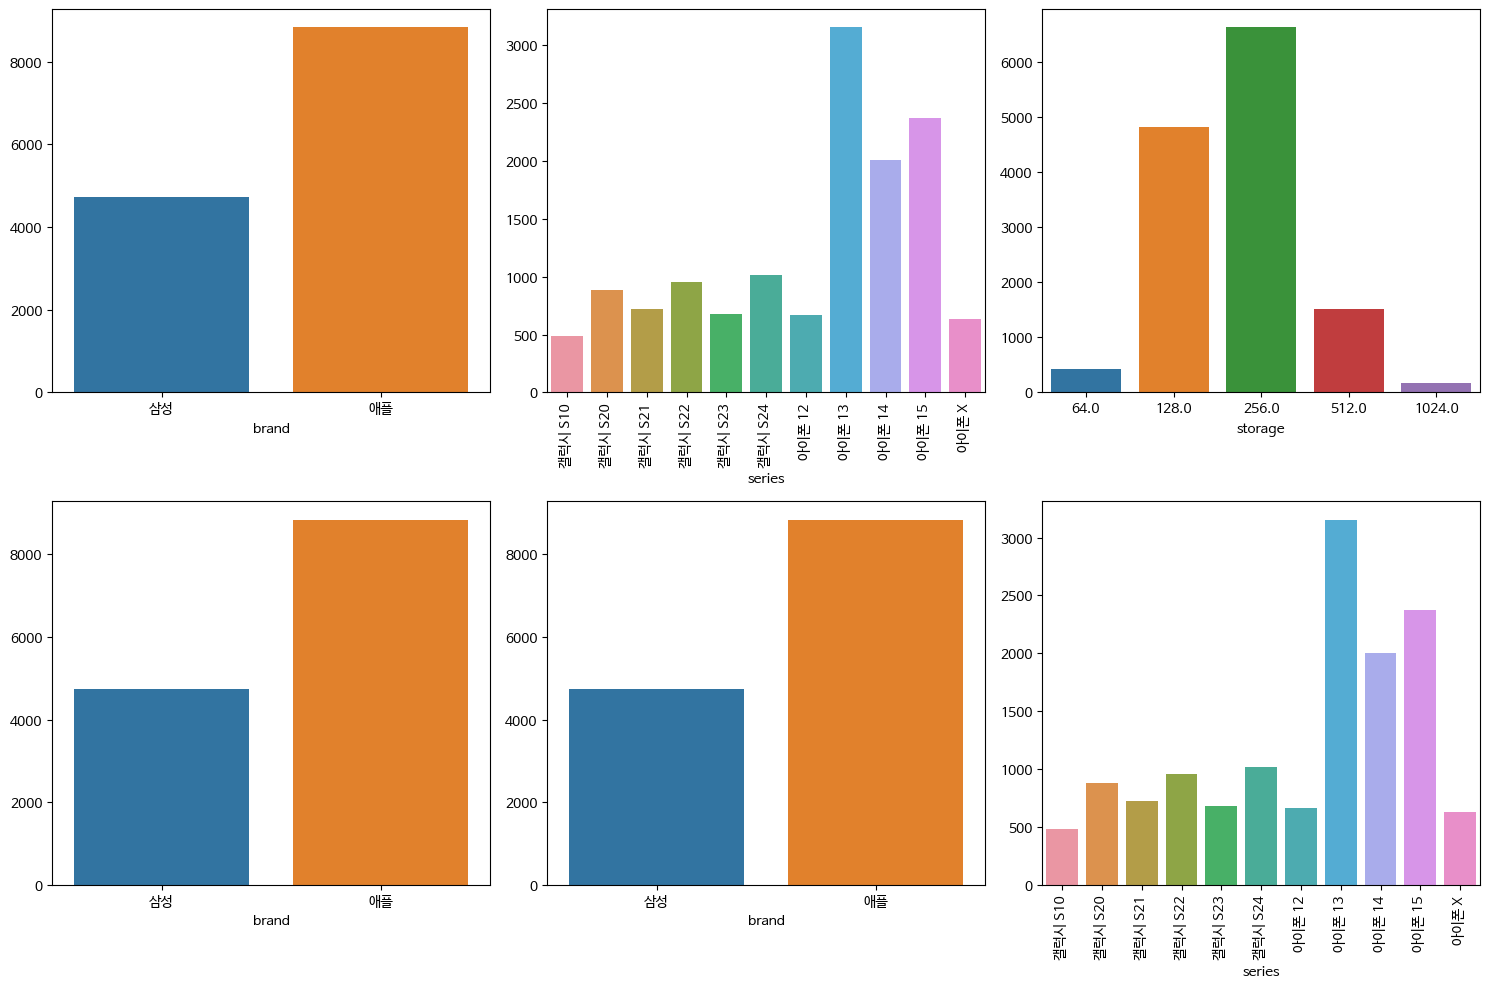

In [73]:
#brand_model_count, series_model_count, storage_model_count, brand_series_count, brand_storage_count, series_storage_count
brand_model_count = df.groupby('brand')['model'].count()
series_model_count = df.groupby('series')['model'].count()
storage_model_count = df.groupby('storage')['model'].count()
brand_series_count = df.groupby('brand')['series'].count()
brand_storage_count = df.groupby('brand')['storage'].count()
series_storage_count = df.groupby('series')['storage'].count()

fig, axs = plt.subplots(2, 3, figsize=(15, 10))
sns.barplot(x=brand_model_count.index, y=brand_model_count.values, ax=axs[0, 0])
sns.barplot(x=series_model_count.index, y=series_model_count.values, ax=axs[0, 1])
axs[0,1].set_xticklabels(axs[0,1].get_xticklabels(), rotation=90)
sns.barplot(x=storage_model_count.index, y=storage_model_count.values, ax=axs[0, 2])
sns.barplot(x=brand_series_count.index, y=brand_series_count.values, ax=axs[1, 0])
sns.barplot(x=brand_storage_count.index, y=brand_storage_count.values, ax=axs[1, 1])
sns.barplot(x=series_storage_count.index, y=series_storage_count.values, ax=axs[1, 2])
axs[1,2].set_xticklabels(axs[1,2].get_xticklabels(), rotation=90)
plt.tight_layout()
plt.show()

<Axes: xlabel='model'>

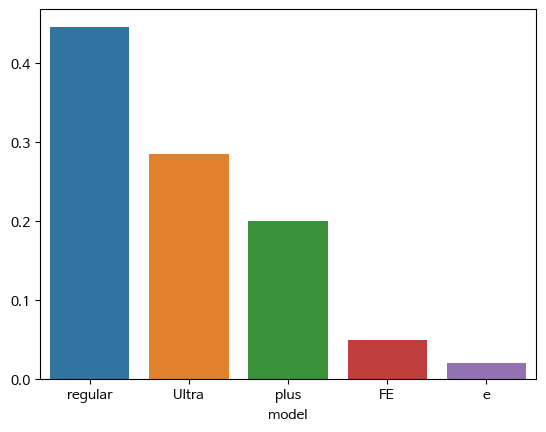

In [74]:
#'brand'== '삼성' 모델 프로포션
samsung_model_proportion = df[df['brand'] == '삼성']['model'].value_counts(normalize=True)
sns.barplot(x=samsung_model_proportion.index, y=samsung_model_proportion.values)

<Axes: xlabel='series'>

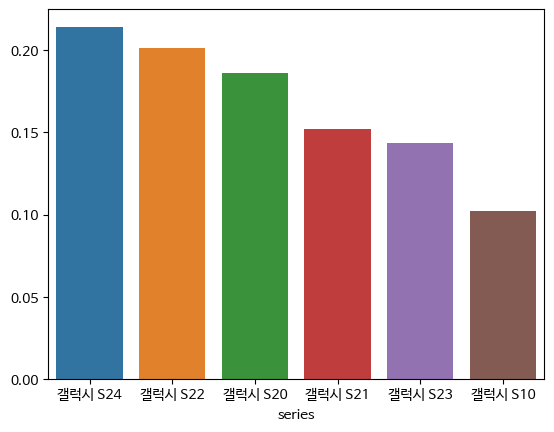

In [75]:
#'brand'== '삼성' 시리즈 프로포션
samsung_series_proportion = df[df['brand'] == '삼성']['series'].value_counts(normalize=True)
sns.barplot(x=samsung_series_proportion.index, y=samsung_series_proportion.values)

<Axes: xlabel='storage'>

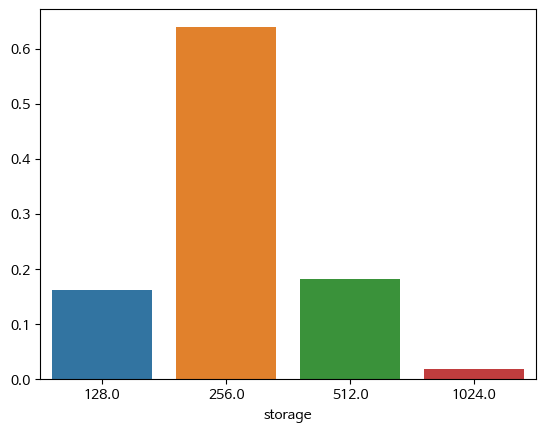

In [76]:
#'brand'== '삼성' 스토리지 프로포션
samsung_storage_proportion = df[df['brand'] == '삼성']['storage'].value_counts(normalize=True)
sns.barplot(x=samsung_storage_proportion.index, y=samsung_storage_proportion.values)

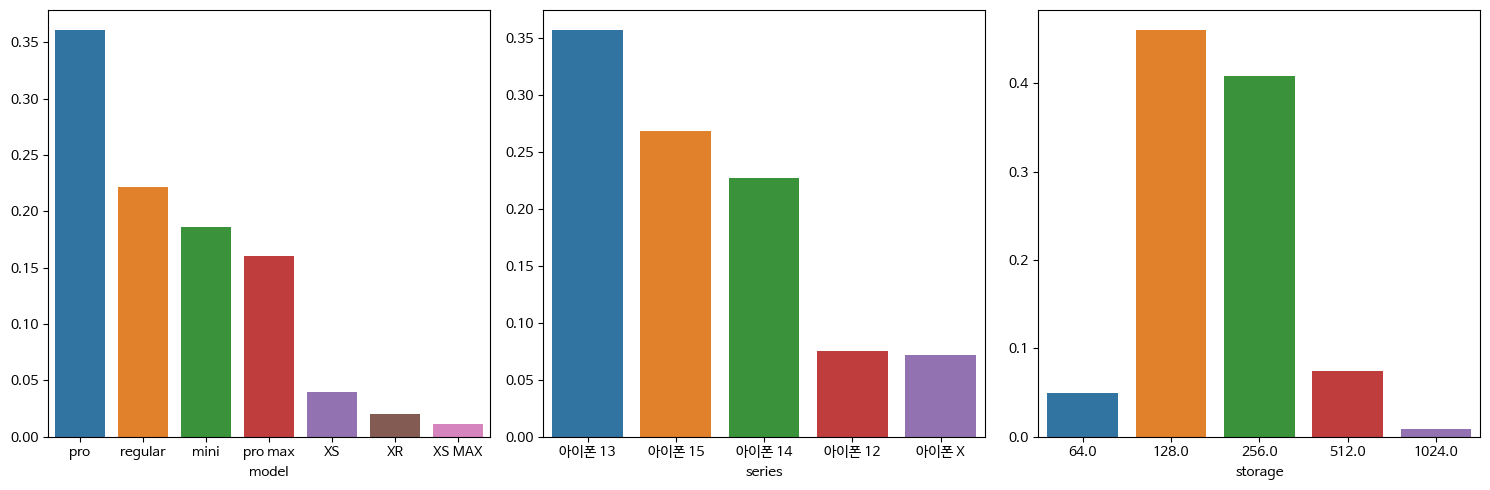

In [77]:
#'brand'== '애플' 모델, 시리즈, 스토리지 프로포션
apple_model_proportion = df[df['brand'] == '애플']['model'].value_counts(normalize=True)
apple_series_proportion = df[df['brand'] == '애플']['series'].value_counts(normalize=True)
apple_storage_proportion = df[df['brand'] == '애플']['storage'].value_counts(normalize=True)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
sns.barplot(x=apple_model_proportion.index, y=apple_model_proportion.values, ax=axs[0])
sns.barplot(x=apple_series_proportion.index, y=apple_series_proportion.values, ax=axs[1])
sns.barplot(x=apple_storage_proportion.index, y=apple_storage_proportion.values, ax=axs[2])
plt.tight_layout()
plt.show()

In [84]:
#모든 '애플' 브랜드 조합가능한 for문 이용한 모델, 시리즈, 스토리지 조합의 수
apple_brand = df[df['brand'] == '애플']

for model in apple_brand['model'].unique():
    for series in apple_brand['series'].unique():
        for storage in apple_brand['storage'].unique():
            print(model, series, storage)

len(apple_brand['model'].unique()) * len(apple_brand['series'].unique()) * len(apple_brand['storage'].unique())

XR 아이폰 X 128.0
XR 아이폰 X 256.0
XR 아이폰 X 64.0
XR 아이폰 X 512.0
XR 아이폰 X 1024.0
XR 아이폰 12 128.0
XR 아이폰 12 256.0
XR 아이폰 12 64.0
XR 아이폰 12 512.0
XR 아이폰 12 1024.0
XR 아이폰 13 128.0
XR 아이폰 13 256.0
XR 아이폰 13 64.0
XR 아이폰 13 512.0
XR 아이폰 13 1024.0
XR 아이폰 14 128.0
XR 아이폰 14 256.0
XR 아이폰 14 64.0
XR 아이폰 14 512.0
XR 아이폰 14 1024.0
XR 아이폰 15 128.0
XR 아이폰 15 256.0
XR 아이폰 15 64.0
XR 아이폰 15 512.0
XR 아이폰 15 1024.0
XS MAX 아이폰 X 128.0
XS MAX 아이폰 X 256.0
XS MAX 아이폰 X 64.0
XS MAX 아이폰 X 512.0
XS MAX 아이폰 X 1024.0
XS MAX 아이폰 12 128.0
XS MAX 아이폰 12 256.0
XS MAX 아이폰 12 64.0
XS MAX 아이폰 12 512.0
XS MAX 아이폰 12 1024.0
XS MAX 아이폰 13 128.0
XS MAX 아이폰 13 256.0
XS MAX 아이폰 13 64.0
XS MAX 아이폰 13 512.0
XS MAX 아이폰 13 1024.0
XS MAX 아이폰 14 128.0
XS MAX 아이폰 14 256.0
XS MAX 아이폰 14 64.0
XS MAX 아이폰 14 512.0
XS MAX 아이폰 14 1024.0
XS MAX 아이폰 15 128.0
XS MAX 아이폰 15 256.0
XS MAX 아이폰 15 64.0
XS MAX 아이폰 15 512.0
XS MAX 아이폰 15 1024.0
XS 아이폰 X 128.0
XS 아이폰 X 256.0
XS 아이폰 X 64.0
XS 아이폰 X 512.0
XS 아이폰 X 1024.0
XS 아이폰 12 128.0
XS 아이폰 12 256.0
XS 

175

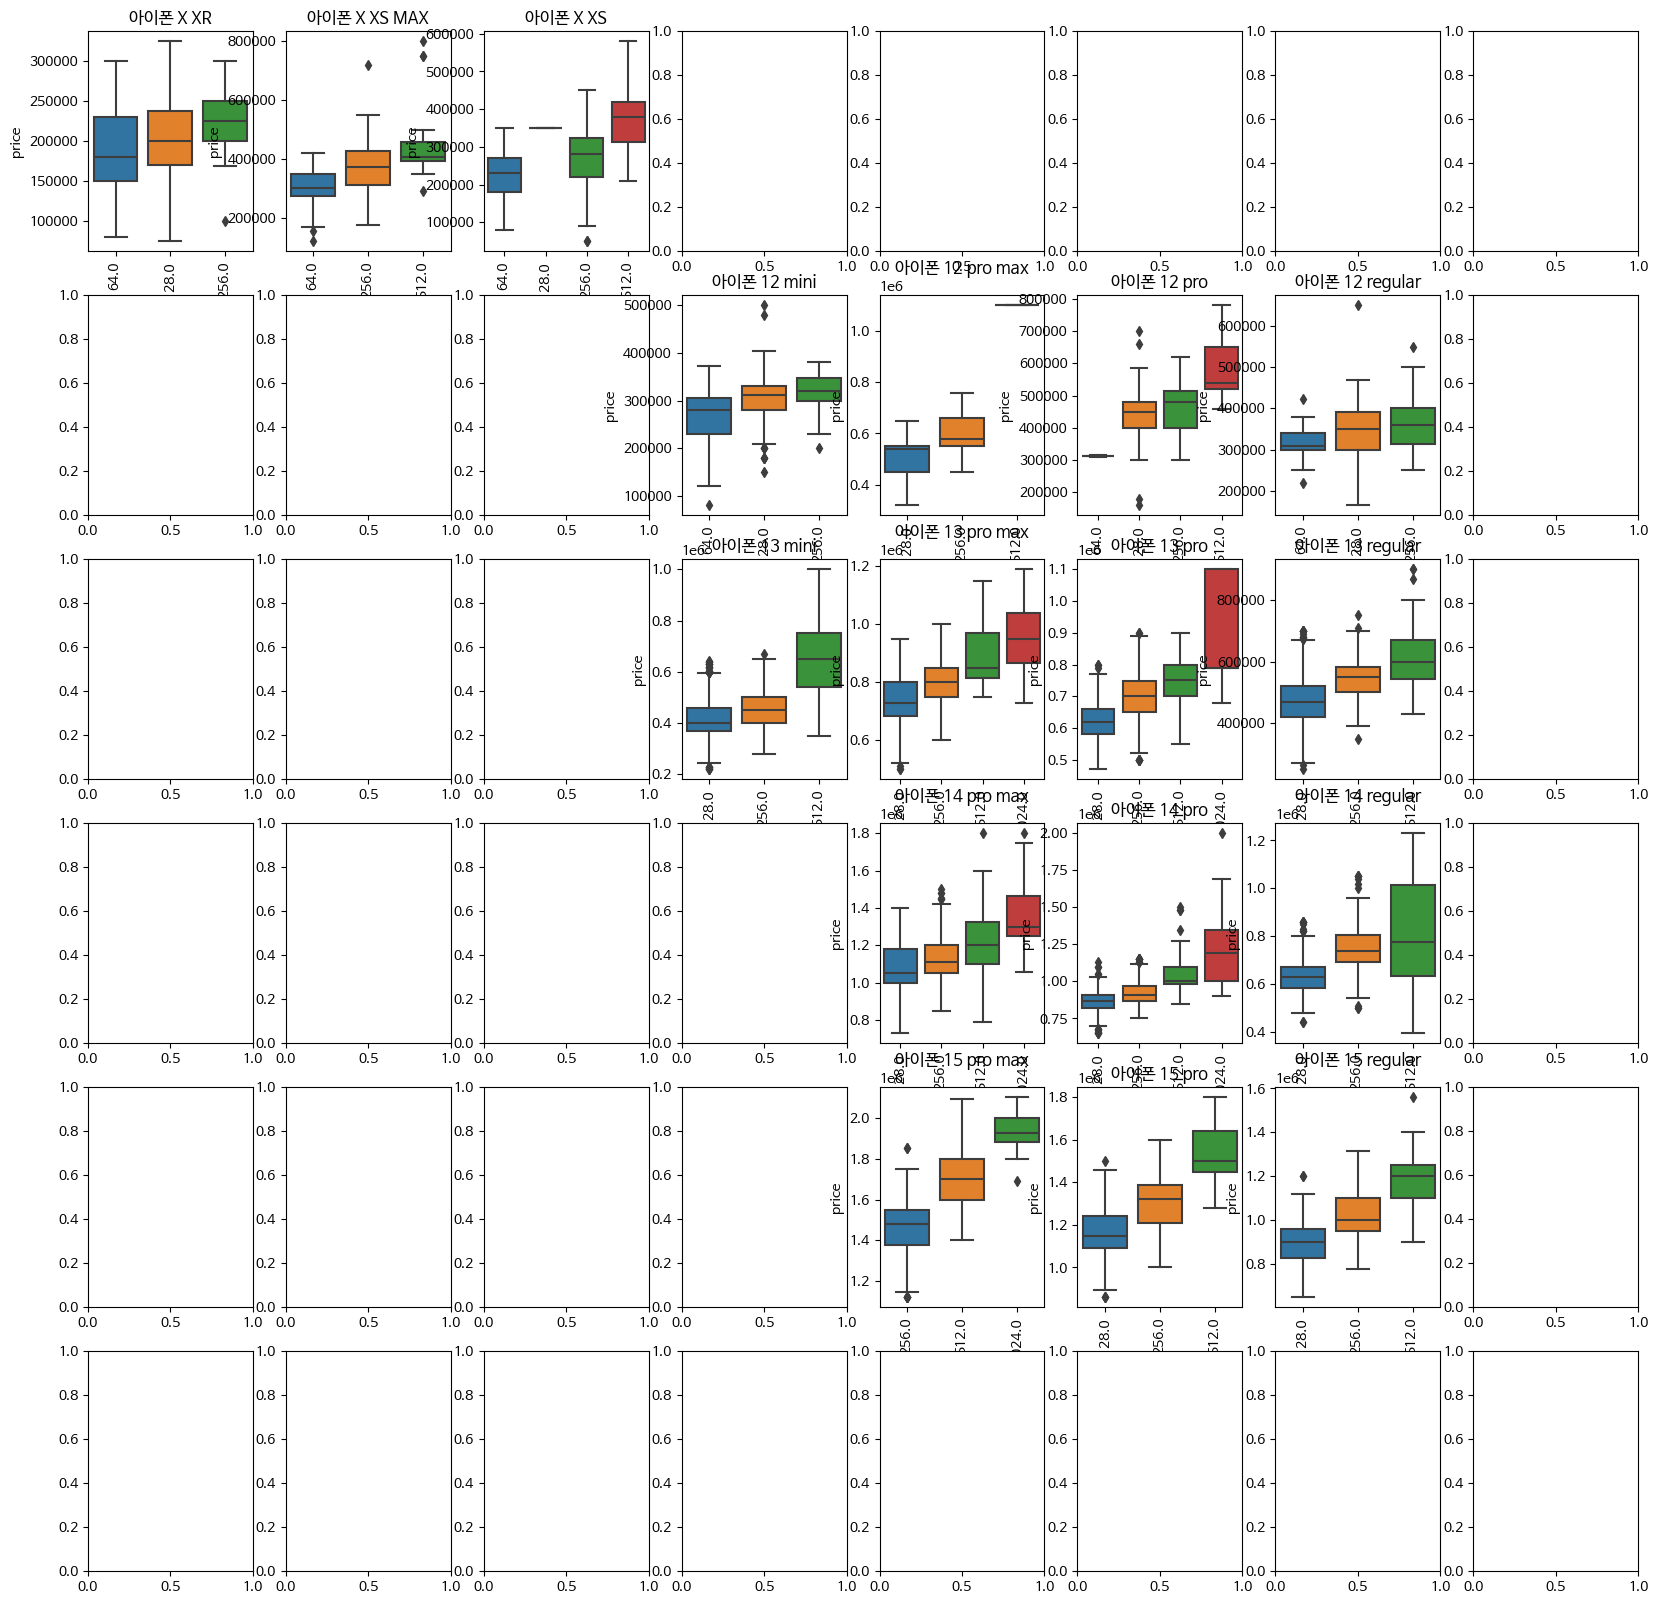

In [89]:
# 모든 '애플' 브랜드 조합가능한 for문 이용한  시리즈, 모델 조합의  가격에 대한  박스플롯 5x4 그리기
df_apple = df[df['brand'] == '애플']

fig, axs = plt.subplots(6, 8, figsize=(20, 20))
for i, series in enumerate(df_apple['series'].unique()):
    for j, model in enumerate(df_apple['model'].unique()):
        #에러가 나는 경우가 있어서 try except로 처리
        try:
            sns.boxplot(x='storage', y='price', data=df_apple[(df_apple['series'] == series) & (df_apple['model'] == model)], ax=axs[i, j])
            axs[i, j].set_title(f'{series} {model}')
            axs[i, j].set_xticklabels(axs[i, j].get_xticklabels(), rotation=90)
        except:
            pass

In [90]:
df_apple['model'].unique()

array(['XR', 'XS MAX', 'XS', 'mini', 'pro max', 'pro', 'regular'],
      dtype=object)

In [91]:
df_apple['series'].unique()

array(['아이폰 X', '아이폰 12', '아이폰 13', '아이폰 14', '아이폰 15'], dtype=object)

In [3]:
import pandas as pd
df = pd.read_csv(r'D:\kdt_240424\workspace\thunder_crawling\통합본_보관\번개_애플삼성통합_0628.csv', encoding='utf-8')
df

,data_pid,location,price,time,title,month,brand,series,model,storage
0,274904539,경상북도 경주시 동천동,280000.0,2024-06-24 18:46:48,아이폰 11프로 256기가 블랙,57,애플,아이폰 11,pro,256
1,274872829,울산광역시 남구 옥동,250000.0,2024-06-24 16:46:48,아이폰11프로 256,57,애플,아이폰 11,pro,256
2,274302954,서울특별시 성동구 왕십리도선동,230000.0,2024-06-24 15:46:48,아이폰11프로 256기가,57,애플,아이폰 11,pro,256
3,240618829,인천광역시 계양구 작전2동,345000.0,2024-06-24 16:46:48,아이폰11프로 64기가 256기가 무잔상 무찍힘 상태굿 ^^,57,애플,아이폰 11,pro,256
4,267016010,경기도 광명시 광명7동,299000.0,2024-06-24 15:46:48,최저가 급처!! 아이폰11pro 11프로 256 미드나잇그린,57,애플,아이폰 11,pro,256
...,...,...,...,...,...,...,...,...,...,...
19557,260671589,충청북도 청주시 서원구 성화.개신.죽림동,1100000.0,2024-04-27 05:12:16,아이폰15 512기가 핑크,9,애플,아이폰 15,regular,512
19558,260439999,경기도 하남시 신장2동,1100000.0,2024-04-27 05:12:19,아이폰15 512기가 옐로우 자급제 팔아요~!,9,애플,아이폰 15,regular,512
19559,259355875,경상남도 김해시 장유1동,1200000.0,2024-04-27 05:12:21,아이폰 15 512기가 미개봉 자급제,9,애플,아이폰 15,regular,512
19560,257219297,서울특별시 서초구 잠원동,1300000.0,2024-03-28 05:12:27,아이폰 15 핑크 512G 애플 매장 구매,9,애플,아이폰 15,regular,512


In [4]:
df['date'] = df['time']
df['date'] = pd.to_datetime(df['date'])
df = df[df['date'] >= '2024-04-01']
df.to_csv(r'D:\kdt_240424\workspace\thunder_crawling\통합본_보관\번개_애플삼성통합_0628_4월이후.csv', encoding='utf-8', index=False)
df

,data_pid,location,price,time,title,month,brand,series,model,storage,date
0,274904539,경상북도 경주시 동천동,280000.0,2024-06-24 18:46:48,아이폰 11프로 256기가 블랙,57,애플,아이폰 11,pro,256,2024-06-24 18:46:48
1,274872829,울산광역시 남구 옥동,250000.0,2024-06-24 16:46:48,아이폰11프로 256,57,애플,아이폰 11,pro,256,2024-06-24 16:46:48
2,274302954,서울특별시 성동구 왕십리도선동,230000.0,2024-06-24 15:46:48,아이폰11프로 256기가,57,애플,아이폰 11,pro,256,2024-06-24 15:46:48
3,240618829,인천광역시 계양구 작전2동,345000.0,2024-06-24 16:46:48,아이폰11프로 64기가 256기가 무잔상 무찍힘 상태굿 ^^,57,애플,아이폰 11,pro,256,2024-06-24 16:46:48
4,267016010,경기도 광명시 광명7동,299000.0,2024-06-24 15:46:48,최저가 급처!! 아이폰11pro 11프로 256 미드나잇그린,57,애플,아이폰 11,pro,256,2024-06-24 15:46:48
...,...,...,...,...,...,...,...,...,...,...,...
19555,261202828,광주광역시 북구 중흥2동,1060000.0,2024-04-27 05:12:14,아이폰 15 플러스 512 블루,9,애플,아이폰 15,regular,512,2024-04-27 05:12:14
19556,261842738,부산광역시 기장군 일광면,1000000.0,2024-05-27 05:12:14,아이폰15 512 핑크 판매 합니다,9,애플,아이폰 15,regular,512,2024-05-27 05:12:14
19557,260671589,충청북도 청주시 서원구 성화.개신.죽림동,1100000.0,2024-04-27 05:12:16,아이폰15 512기가 핑크,9,애플,아이폰 15,regular,512,2024-04-27 05:12:16
19558,260439999,경기도 하남시 신장2동,1100000.0,2024-04-27 05:12:19,아이폰15 512기가 옐로우 자급제 팔아요~!,9,애플,아이폰 15,regular,512,2024-04-27 05:12:19


In [1]:
import pandas as pd
df = pd.read_csv(r'D:\kdt_240424\workspace\thunder_crawling\통합본_보관\번개_애플삼성통합_0628_4월이후.csv', encoding='utf-8')
df.head()

,data_pid,location,price,time,title,month,brand,series,model,storage,date
0,274904539,경상북도 경주시 동천동,280000.0,2024-06-24 18:46:48,아이폰 11프로 256기가 블랙,57,애플,아이폰 11,pro,256,2024-06-24 18:46:48
1,274872829,울산광역시 남구 옥동,250000.0,2024-06-24 16:46:48,아이폰11프로 256,57,애플,아이폰 11,pro,256,2024-06-24 16:46:48
2,274302954,서울특별시 성동구 왕십리도선동,230000.0,2024-06-24 15:46:48,아이폰11프로 256기가,57,애플,아이폰 11,pro,256,2024-06-24 15:46:48
3,240618829,인천광역시 계양구 작전2동,345000.0,2024-06-24 16:46:48,아이폰11프로 64기가 256기가 무잔상 무찍힘 상태굿 ^^,57,애플,아이폰 11,pro,256,2024-06-24 16:46:48
4,267016010,경기도 광명시 광명7동,299000.0,2024-06-24 15:46:48,최저가 급처!! 아이폰11pro 11프로 256 미드나잇그린,57,애플,아이폰 11,pro,256,2024-06-24 15:46:48


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14304 entries, 0 to 14303
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   data_pid  14304 non-null  int64  
 1   location  14304 non-null  object 
 2   price     14304 non-null  float64
 3   time      14304 non-null  object 
 4   title     14304 non-null  object 
 5   month     14304 non-null  int64  
 6   brand     14304 non-null  object 
 7   series    14304 non-null  object 
 8   model     14304 non-null  object 
 9   storage   14304 non-null  object 
 10  date      14304 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 1.2+ MB


In [3]:
df['date'] = pd.to_datetime(df['time'])


In [4]:
df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14304 entries, 0 to 14303
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   data_pid  14304 non-null  int64         
 1   location  14304 non-null  object        
 2   price     14304 non-null  float64       
 3   time      14304 non-null  object        
 4   title     14304 non-null  object        
 5   month     14304 non-null  int64         
 6   brand     14304 non-null  object        
 7   series    14304 non-null  object        
 8   model     14304 non-null  object        
 9   storage   14304 non-null  object        
 10  date      14304 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(7)
memory usage: 1.2+ MB


In [6]:
df.storage.replace('1TB', '1024', inplace=True)
df.storage.value_counts()

storage
256      6828
128      5044
512      1499
64.0      300
256.0     208
1024      165
64        134
128.0      88
512.0      38
Name: count, dtype: int64

In [7]:
df.storage.astype('float')

0        256.0
1        256.0
2        256.0
3        256.0
4        256.0
         ...  
14299    512.0
14300    512.0
14301    512.0
14302    512.0
14303    512.0
Name: storage, Length: 14304, dtype: float64

In [8]:
df.storage.unique()

array(['256', '512', '128', '1024', '128.0', '256.0', '64.0', '512.0',
       '64'], dtype=object)

In [9]:
df.storage.astype('float')

0        256.0
1        256.0
2        256.0
3        256.0
4        256.0
         ...  
14299    512.0
14300    512.0
14301    512.0
14302    512.0
14303    512.0
Name: storage, Length: 14304, dtype: float64

In [12]:
df.storage.value_counts()

storage
256      6828
128      5044
512      1499
64.0      300
256.0     208
1024      165
64        134
128.0      88
512.0      38
Name: count, dtype: int64

In [11]:
df.storage.astype('float')

0        256.0
1        256.0
2        256.0
3        256.0
4        256.0
         ...  
14299    512.0
14300    512.0
14301    512.0
14302    512.0
14303    512.0
Name: storage, Length: 14304, dtype: float64

In [14]:
df['storage'] = df['storage'].astype('float')

In [15]:
df.storage.value_counts()

storage
256.0     7036
128.0     5132
512.0     1537
64.0       434
1024.0     165
Name: count, dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14304 entries, 0 to 14303
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   data_pid  14304 non-null  int64         
 1   location  14304 non-null  object        
 2   price     14304 non-null  float64       
 3   time      14304 non-null  object        
 4   title     14304 non-null  object        
 5   month     14304 non-null  int64         
 6   brand     14304 non-null  object        
 7   series    14304 non-null  object        
 8   model     14304 non-null  object        
 9   storage   14304 non-null  float64       
 10  date      14304 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(2), object(6)
memory usage: 1.2+ MB


In [17]:
df.to_csv(r'D:\kdt_240424\workspace\thunder_crawling\통합본_보관\번개_애플삼성통합_0628_4월이후.csv', encoding='utf-8', index=False)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14304 entries, 0 to 14303
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   data_pid  14304 non-null  int64         
 1   location  14304 non-null  object        
 2   price     14304 non-null  float64       
 3   time      14304 non-null  object        
 4   title     14304 non-null  object        
 5   month     14304 non-null  int64         
 6   brand     14304 non-null  object        
 7   series    14304 non-null  object        
 8   model     14304 non-null  object        
 9   storage   14304 non-null  float64       
 10  date      14304 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(2), object(6)
memory usage: 1.2+ MB


In [19]:
#브랜드 밸류 카운트
brand_value = df['brand'].value_counts()
brand_value

brand
애플    9565
삼성    4739
Name: count, dtype: int64

In [21]:
# 5월이후 데이터만 저장
df = df[df['date'] >= '2024-05-01']
df.to_csv('통합본_보관\번개_애플삼성통합_0628_5월이후.csv', encoding='utf-8', index=False)

In [22]:
#brand proportion
df['brand'].value_counts(normalize=True)

brand
애플    0.623701
삼성    0.376299
Name: proportion, dtype: float64

In [23]:
#6월이후 데이터만 저장 
df = df[df['date'] >= '2024-06-01']
df.to_csv('통합본_보관\번개_애플삼성통합_0628_6월이후.csv', encoding='utf-8', index=False)

In [24]:
#brand proportion
df['brand'].value_counts(normalize=True)

brand
애플    0.567576
삼성    0.432424
Name: proportion, dtype: float64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6711 entries, 0 to 14295
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   data_pid  6711 non-null   int64         
 1   location  6711 non-null   object        
 2   price     6711 non-null   float64       
 3   time      6711 non-null   object        
 4   title     6711 non-null   object        
 5   month     6711 non-null   int64         
 6   brand     6711 non-null   object        
 7   series    6711 non-null   object        
 8   model     6711 non-null   object        
 9   storage   6711 non-null   float64       
 10  date      6711 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(2), object(6)
memory usage: 629.2+ KB


In [26]:
df = pd.read_csv('통합본_보관\번개_애플삼성통합_0628_5월이후.csv', encoding='utf-8')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11063 entries, 0 to 11062
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   data_pid  11063 non-null  int64  
 1   location  11063 non-null  object 
 2   price     11063 non-null  float64
 3   time      11063 non-null  object 
 4   title     11063 non-null  object 
 5   month     11063 non-null  int64  
 6   brand     11063 non-null  object 
 7   series    11063 non-null  object 
 8   model     11063 non-null  object 
 9   storage   11063 non-null  float64
 10  date      11063 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 950.9+ KB


In [28]:
df.storage.value_counts()

storage
256.0     5515
128.0     3887
512.0     1192
64.0       355
1024.0     114
Name: count, dtype: int64

<Axes: xlabel='storage'>

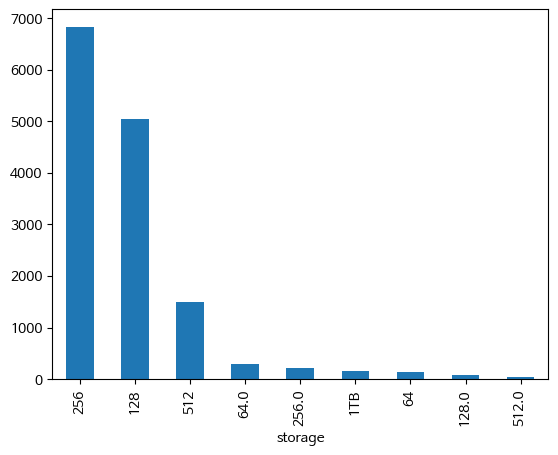

In [7]:
df['storage'].value_counts().plot(kind='bar')

In [30]:
#brand, series, medel 별 storage 평균
df.groupby(['brand', 'series', 'model'])['storage'].mean()

brand  series   model  
삼성     갤럭시 S10  e          146.285714
                plus       238.080000
                regular    249.924051
       갤럭시 S20  FE         128.000000
                Ultra      256.000000
                plus       249.635359
                regular    147.027027
       갤럭시 S21  Ultra      262.243902
                plus       256.000000
                regular    256.000000
       갤럭시 S22  Ultra      327.645051
                plus       256.000000
                regular    256.643216
       갤럭시 S23  Ultra      385.837321
                plus       441.557047
                regular    330.926829
       갤럭시 S24  Ultra      459.713528
                plus       377.904762
                regular    334.222222
애플     아이폰 11   pro        272.480687
                pro max    276.114286
                regular    142.500000
       아이폰 12   mini       119.703704
                pro        201.014085
                pro max    222.315789
                regular   

<Axes: xlabel='brand,series,model'>

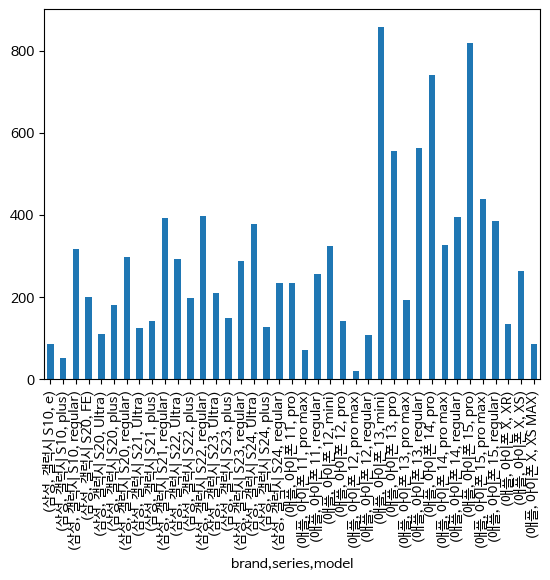

In [33]:
df.groupby(['brand', 'series', 'model'])['model'].count().plot(kind='bar')

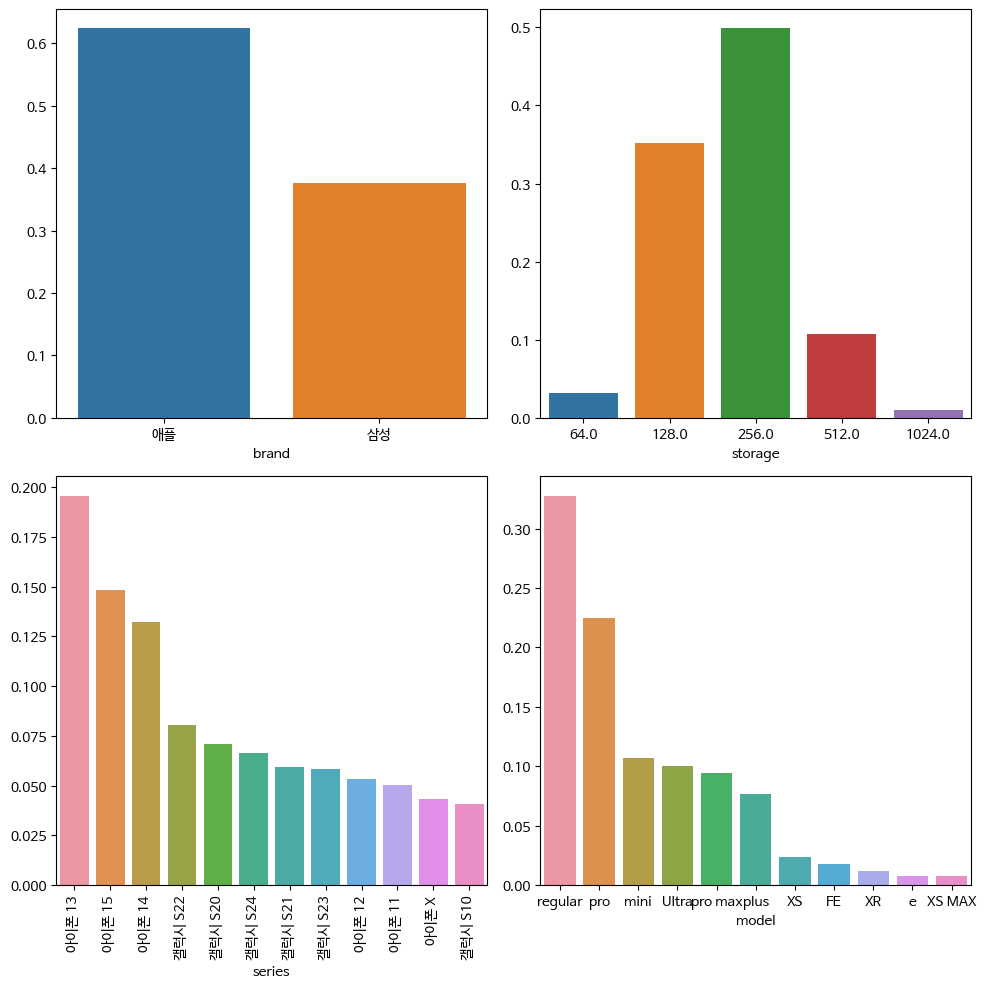

In [34]:
#brand_proportion, storage_proportion, series_proportion, model_proportion,
brand_proportion = df['brand'].value_counts(normalize=True)
storage_proportion = df['storage'].value_counts(normalize=True)
series_proportion = df['series'].value_counts(normalize=True)
model_proportion = df['model'].value_counts(normalize=True)


fig, axs = plt.subplots(2, 2, figsize=(10, 10))
sns.barplot(x=brand_proportion.index, y=brand_proportion.values, ax=axs[0, 0])
sns.barplot(x=storage_proportion.index, y=storage_proportion.values, ax=axs[0, 1])
sns.barplot(x=series_proportion.index, y=series_proportion.values, ax=axs[1, 0])
axs[1,0].set_xticklabels(axs[1,0].get_xticklabels(), rotation=90)
sns.barplot(x=model_proportion.index, y=model_proportion.values, ax=axs[1, 1])
plt.tight_layout()
plt.show()

<Axes: xlabel='model'>

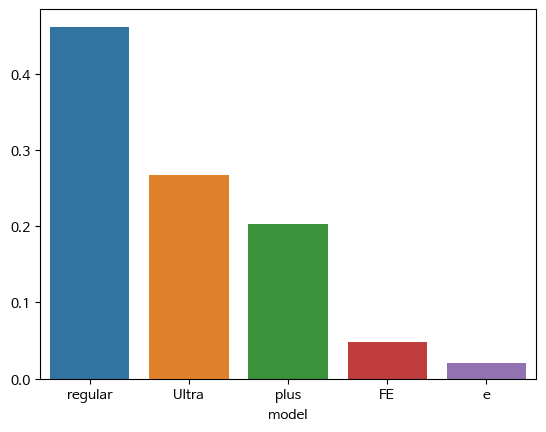

In [35]:
#'brand'== '삼성' 모델 프로포션
samsung_model_proportion = df[df['brand'] == '삼성']['model'].value_counts(normalize=True)
sns.barplot(x=samsung_model_proportion.index, y=samsung_model_proportion.values)

<Axes: xlabel='series'>

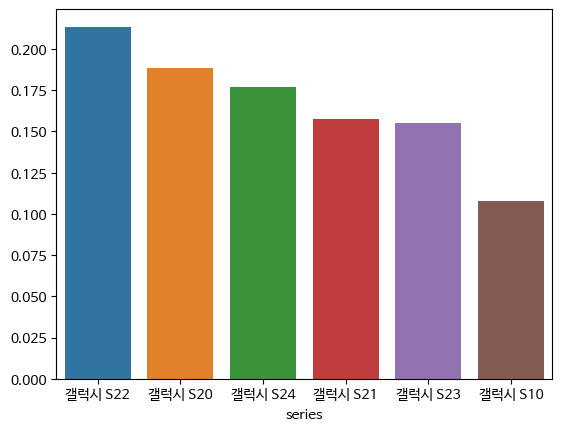

In [36]:
#'brand'== '삼성' 시리즈 프로포션
samsung_series_proportion = df[df['brand'] == '삼성']['series'].value_counts(normalize=True)
sns.barplot(x=samsung_series_proportion.index, y=samsung_series_proportion.values)

<Axes: xlabel='storage'>

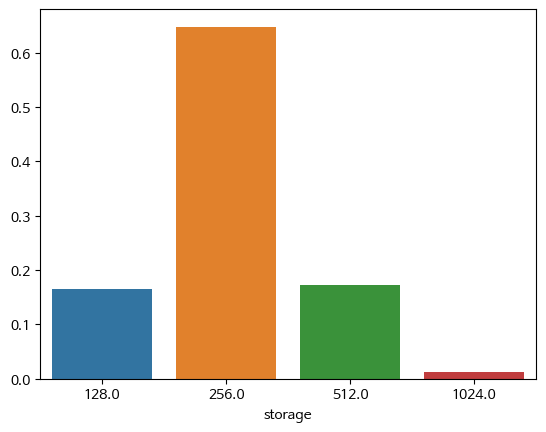

In [37]:
#'brand'== '삼성' 스토리지 프로포션
samsung_storage_proportion = df[df['brand'] == '삼성']['storage'].value_counts(normalize=True)
sns.barplot(x=samsung_storage_proportion.index, y=samsung_storage_proportion.values)

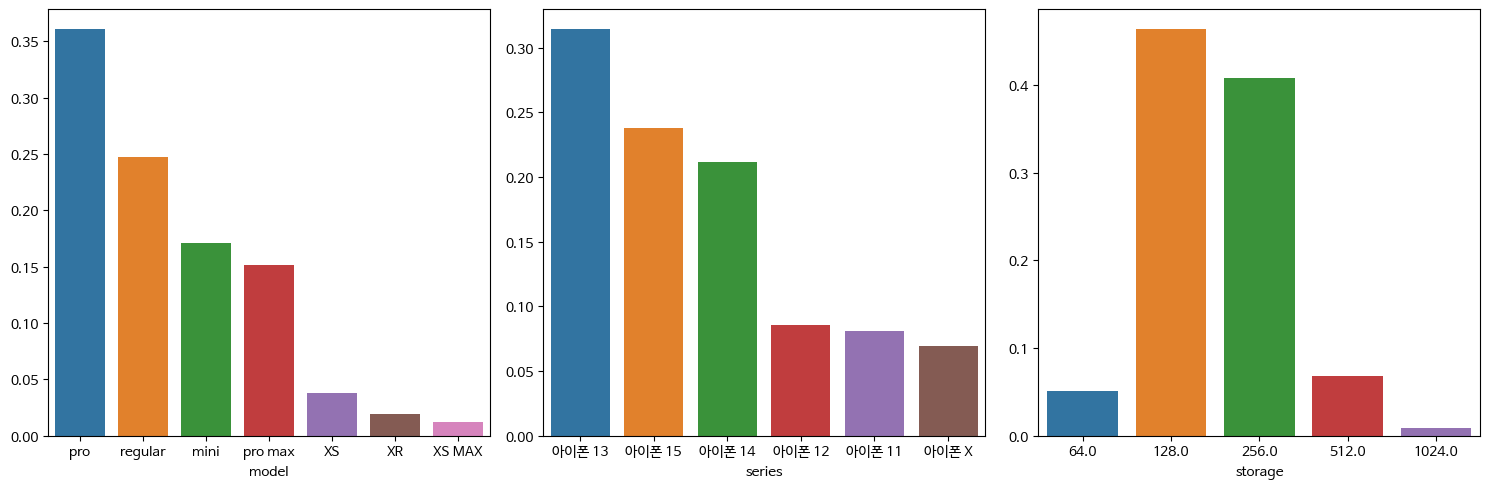

In [38]:
#'brand'== '애플' 모델, 시리즈, 스토리지 프로포션
apple_model_proportion = df[df['brand'] == '애플']['model'].value_counts(normalize=True)
apple_series_proportion = df[df['brand'] == '애플']['series'].value_counts(normalize=True)
apple_storage_proportion = df[df['brand'] == '애플']['storage'].value_counts(normalize=True)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
sns.barplot(x=apple_model_proportion.index, y=apple_model_proportion.values, ax=axs[0])
sns.barplot(x=apple_series_proportion.index, y=apple_series_proportion.values, ax=axs[1])
sns.barplot(x=apple_storage_proportion.index, y=apple_storage_proportion.values, ax=axs[2])
plt.tight_layout()
plt.show()

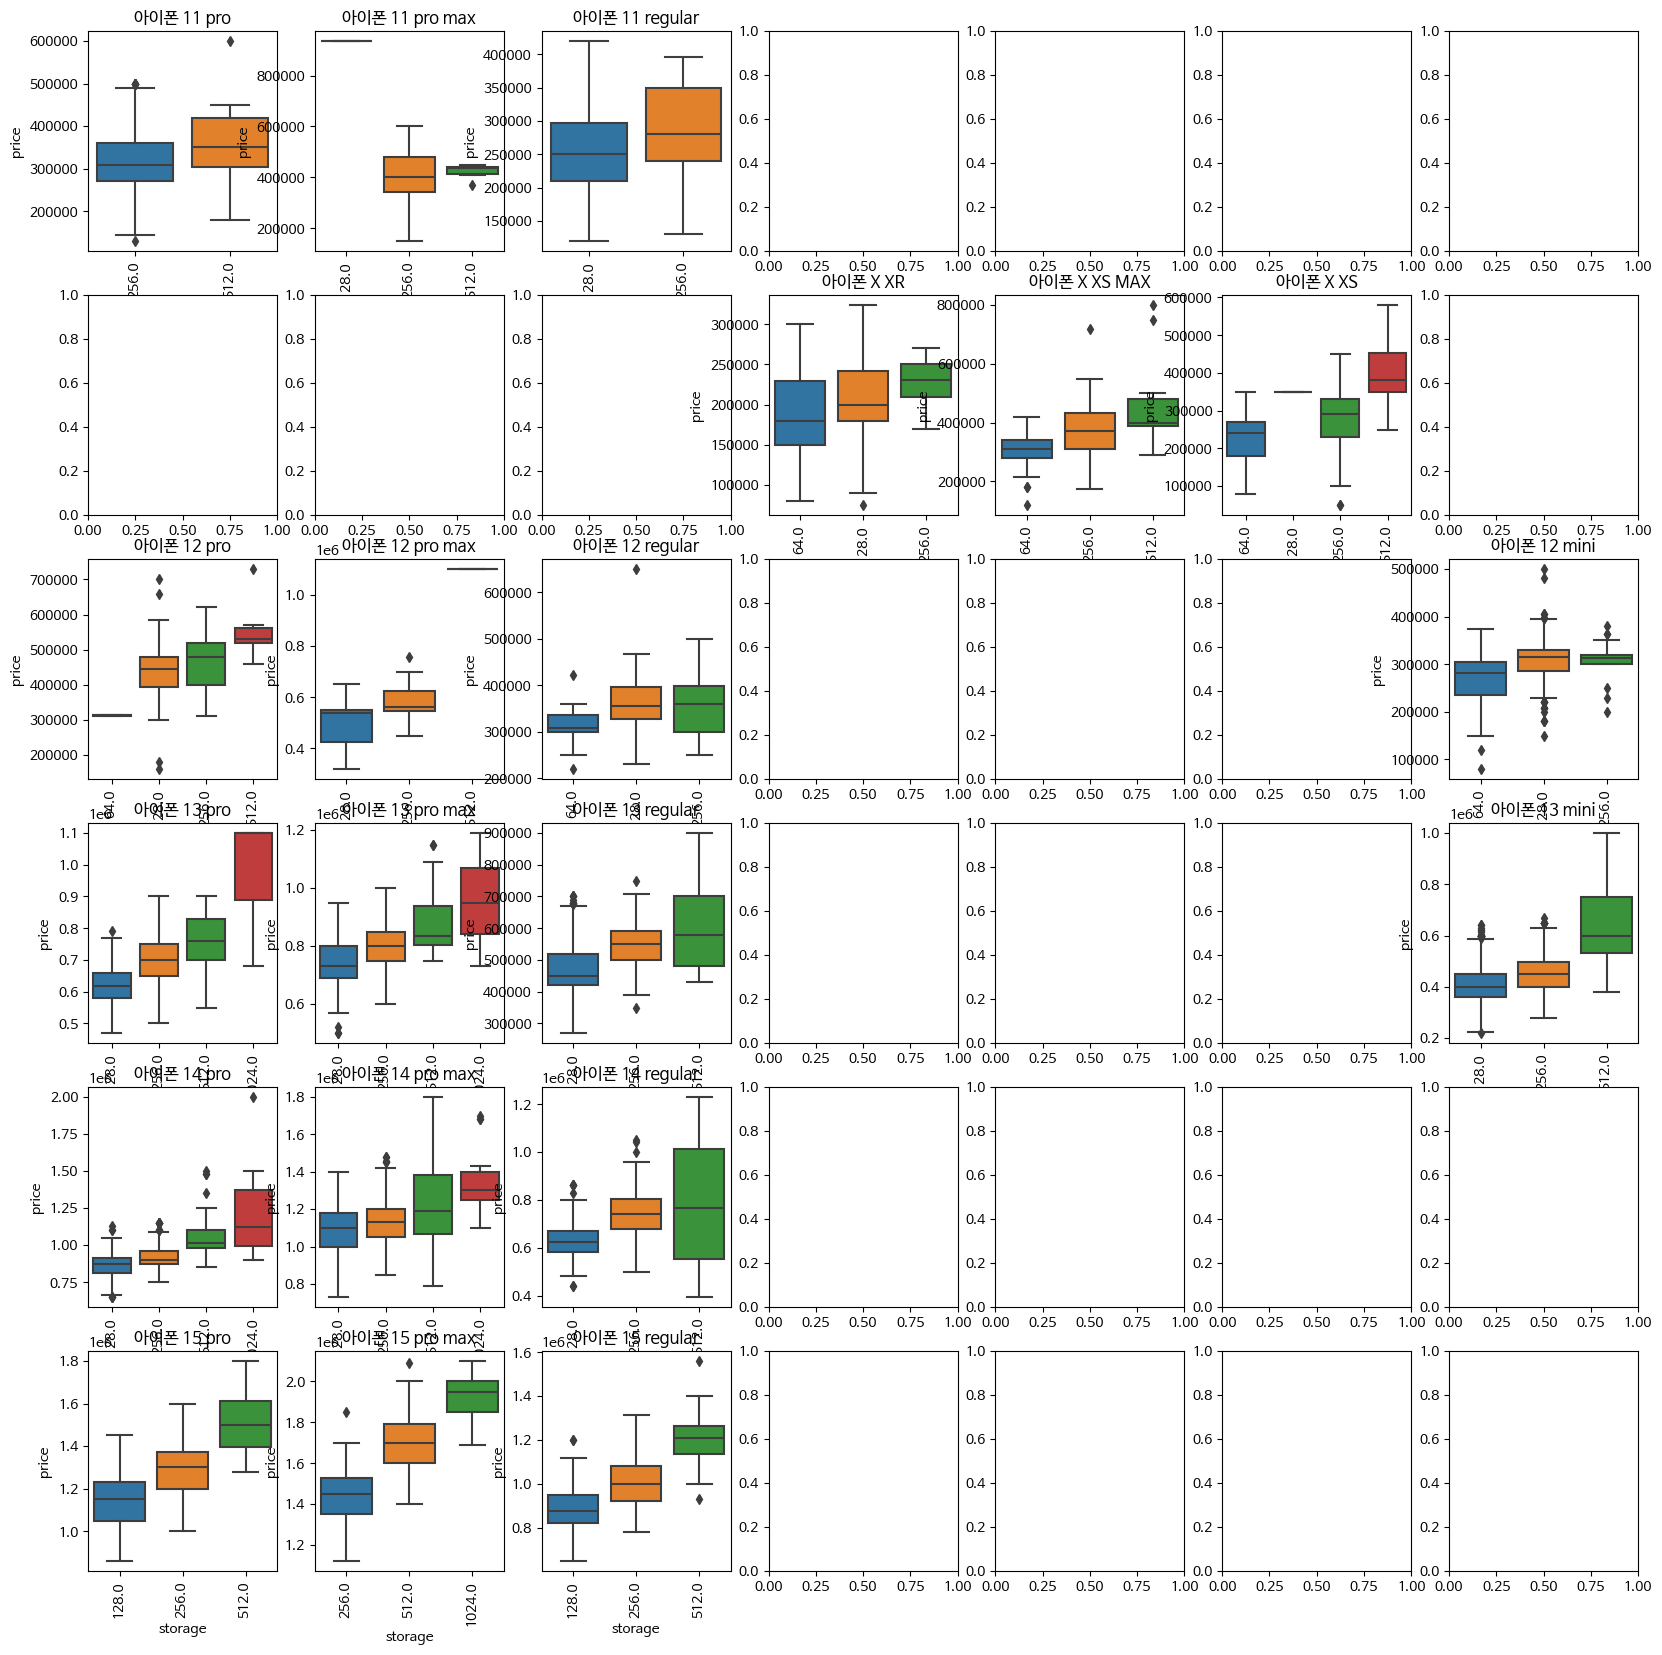

In [40]:
# 모든 '애플' 브랜드 조합가능한 for문 이용한  시리즈, 모델 조합의  가격에 대한  박스플롯 5x4 그리기
df_apple = df[df['brand'] == '애플']

fig, axs = plt.subplots(6, 7, figsize=(20, 20))
for i, series in enumerate(df_apple['series'].unique()):
    for j, model in enumerate(df_apple['model'].unique()):
        #에러가 나는 경우가 있어서 try except로 처리
        try:
            sns.boxplot(x='storage', y='price', data=df_apple[(df_apple['series'] == series) & (df_apple['model'] == model)], ax=axs[i, j])
            axs[i, j].set_title(f'{series} {model}')
            axs[i, j].set_xticklabels(axs[i, j].get_xticklabels(), rotation=90)
        except:
            pass

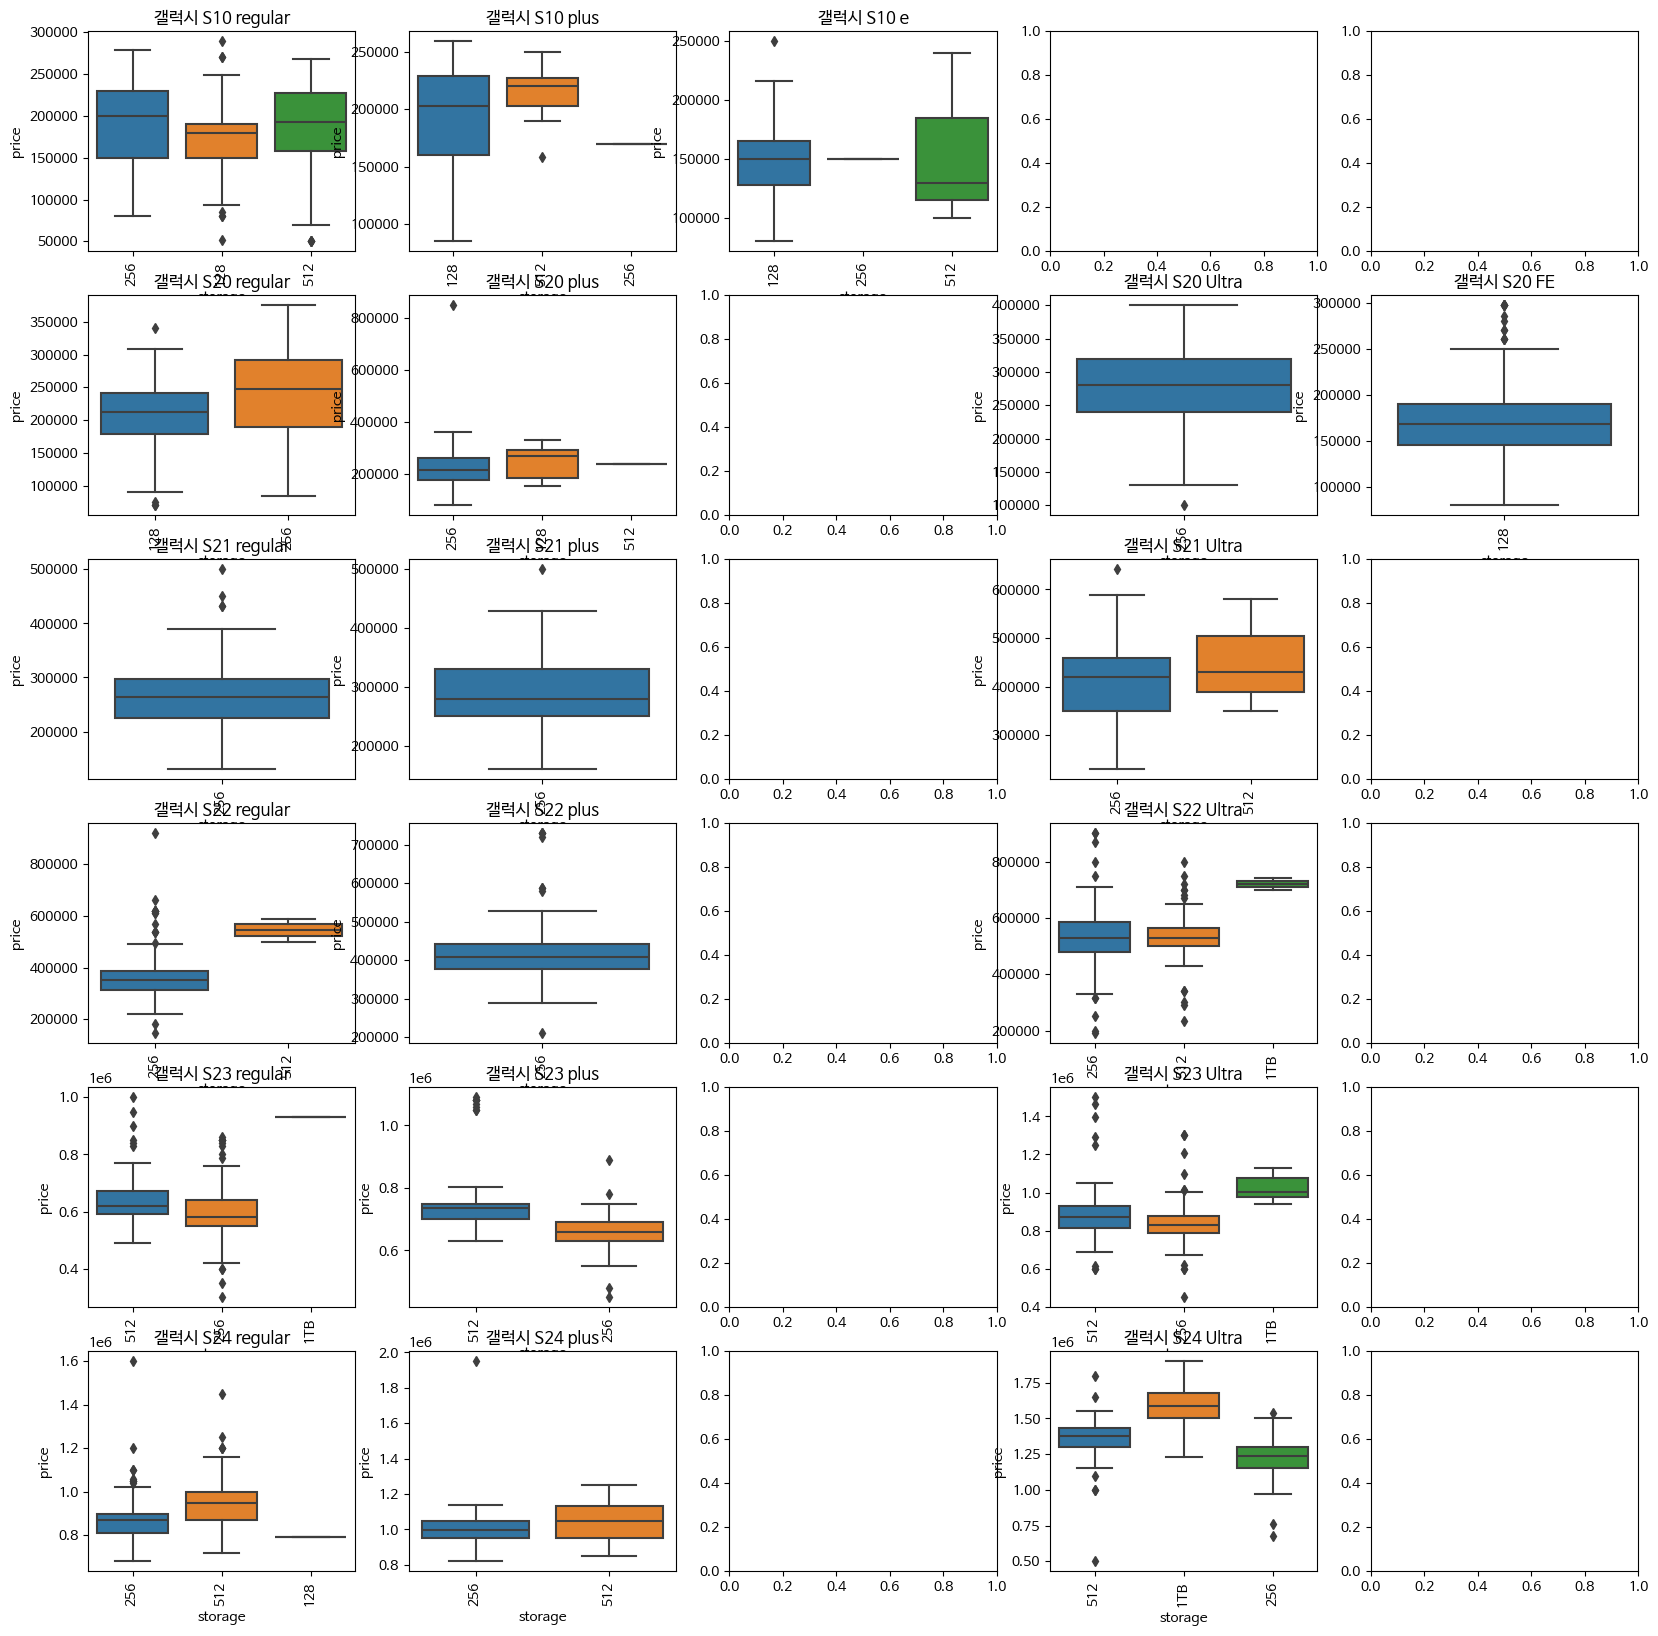

In [9]:
# 모든 '삼성' 브랜드 조합가능한 for문 이용한  시리즈, 모델 조합의  가격에 대한  박스플롯 6 * 7 그리기
df_apple = df[df['brand'] == '삼성']

fig, axs = plt.subplots(6, 5, figsize=(20, 20))
for i, series in enumerate(df_apple['series'].unique()):
    for j, model in enumerate(df_apple['model'].unique()):
        #에러가 나는 경우가 있어서 try except로 처리
        try:
            sns.boxplot(x='storage', y='price', data=df_apple[(df_apple['series'] == series) & (df_apple['model'] == model)], ax=axs[i, j])
            axs[i, j].set_title(f'{series} {model}')
            axs[i, j].set_xticklabels(axs[i, j].get_xticklabels(), rotation=90)
        except:
            pass

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14304 entries, 0 to 19559
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   data_pid  14304 non-null  int64         
 1   location  14304 non-null  object        
 2   price     14304 non-null  float64       
 3   time      14304 non-null  object        
 4   title     14304 non-null  object        
 5   month     14304 non-null  int64         
 6   brand     14304 non-null  object        
 7   series    14304 non-null  object        
 8   model     14304 non-null  object        
 9   storage   14304 non-null  object        
 10  date      14304 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(7)
memory usage: 1.3+ MB


In [11]:
df.title.str.contains('부품').sum()

5

In [12]:
#부품 제거
df = df[~df.title.str.contains('부품')]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14299 entries, 0 to 19559
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   data_pid  14299 non-null  int64         
 1   location  14299 non-null  object        
 2   price     14299 non-null  float64       
 3   time      14299 non-null  object        
 4   title     14299 non-null  object        
 5   month     14299 non-null  int64         
 6   brand     14299 non-null  object        
 7   series    14299 non-null  object        
 8   model     14299 non-null  object        
 9   storage   14299 non-null  object        
 10  date      14299 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(7)
memory usage: 1.3+ MB


In [13]:
# 갤럭시 24 울트라 선택
df.model.unique()

array(['pro', 'pro max', 'regular', 'plus', 'e', 'Ultra', 'FE', 'XR',
       'XS MAX', 'XS', 'mini'], dtype=object)

In [14]:
df.series.unique()

array(['아이폰 11', '갤럭시 S10', '갤럭시 S20', '갤럭시 S21', '갤럭시 S22', '갤럭시 S23',
       '갤럭시 S24', '아이폰 X', '아이폰 12', '아이폰 13', '아이폰 14', '아이폰 15'],
      dtype=object)

In [16]:
s24_df = df[df['series'] == '갤럭시 S24']
s24_df.model.unique()

array(['regular', 'plus', 'Ultra'], dtype=object)